## Import Modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print(pd.__version__)
import nbashots as nba 
import plotly.plotly as py
import ipywidgets as widgets
sorted(widgets.Widget.widget_types)
%matplotlib inline
import os,sys
from PIL import Image
from matplotlib.offsetbox import  OffsetImage

import datetime

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


0.18.1


## Read and Clean Data

In [2]:
#Read csv files for shot logs, team_id, and player_id
shots = pd.read_csv('shots_2015.csv')
team_id = pd.read_csv('team_id.csv')
team_id = team_id.drop(team_id.index[0])
players_id = pd.read_csv('player_id.csv')

In [3]:
#Rename the columns to pythonic syntax
shots.rename(columns=lambda x : x.lower().replace(" ", "_"), inplace=True)

In [4]:
team_id = team_id.sort_values('TEAM_NAME')

In [5]:
team_dict = dict(zip(team_id['TEAM_ID'].values, team_id['TEAM_NAME'].values))
team_dict.pop(0,'nan')

'nan'

In [6]:
shots['team_name'] = shots['team_id'].map(team_dict)

## Interactive NBA shot chart

In [7]:
def team_shot_chart(teamid,teamname):
    df = shots[shots.team_id == teamid]
    cmap=plt.cm.gist_heat_r
    grid = nba.shot_chart_jointplot(df.loc_x, df.loc_y, kind="hex",
                                title=(teamname,'FGA 2015-16 Season'),
                                cmap=cmap)
    plt.show()

In [8]:
#Dropdown menu for shot chart graph, button radio, plotting team logo
from ipywidgets import widgets
from IPython.display import display
from matplotlib.offsetbox import OffsetImage

In [9]:
def team_logo(teamname):
    teamname.lower()
    img_file = "logos/"+str(teamname) + ".png"
    im =Image.open(img_file)
    return im

### Scatter and Histogram KDE Marginal Joint Plot

In [10]:
selection = widgets.Dropdown(description ='Pick an NBA team');
selection.options = team_id.TEAM_NAME.tolist();
display(selection);

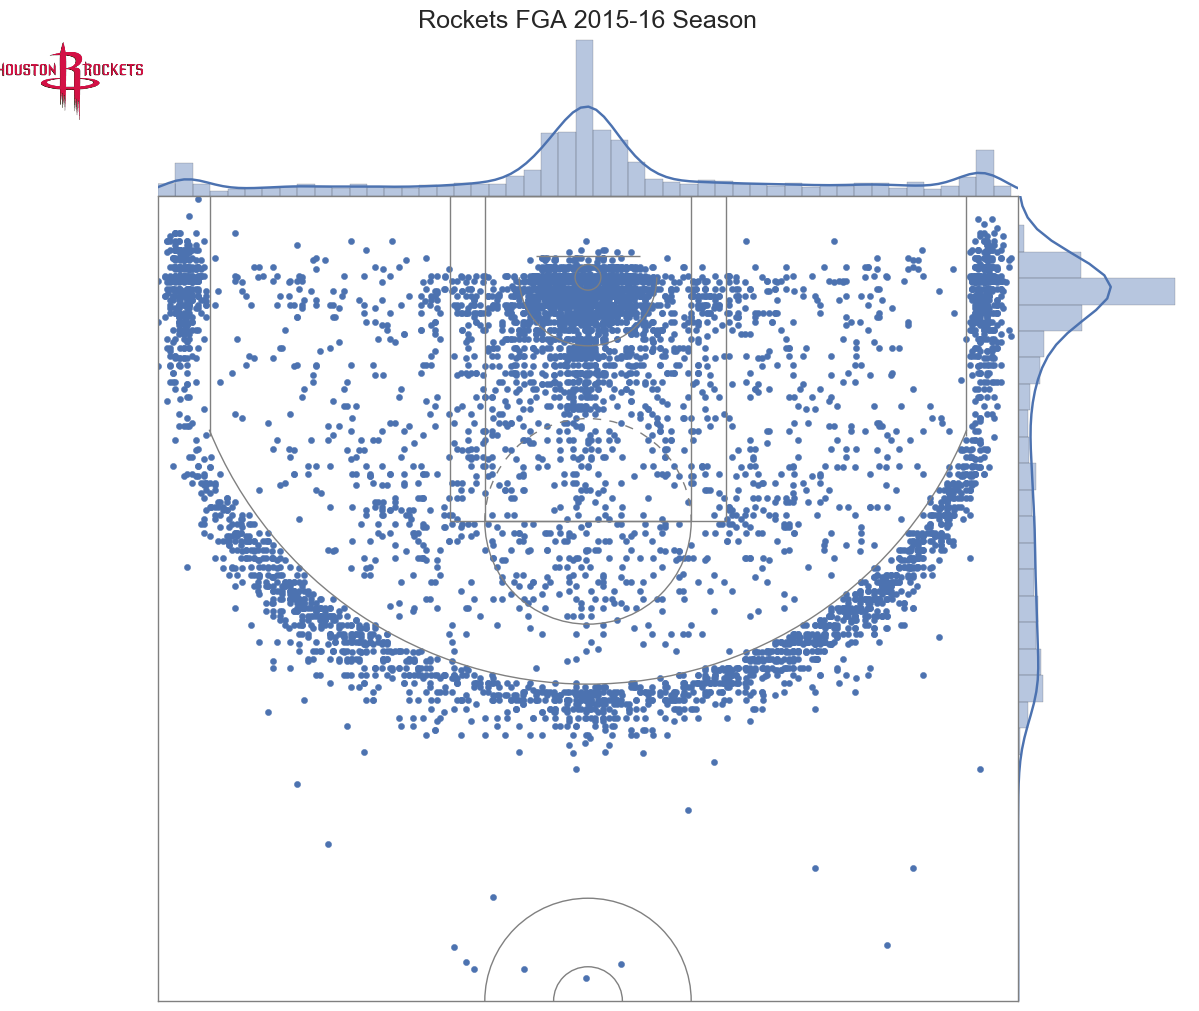

In [11]:
def on_button_clicked(b):
    df = shots[shots.team_name == selection.value]
    cmap=plt.cm.gist_heat_r
    grid = nba.shot_chart_jointgrid(df.loc_x, df.loc_y, joint_type = 'scatter',
                                title=('{} FGA 2015-16 Season'.format(selection.value)))
    offset_img = OffsetImage(team_logo(selection.value), zoom=0.4)
    offset_img.set_offset((-10,850))
    grid.ax_joint.add_artist(offset_img)
button = widgets.Button(description= 'Plot the shot chart');
display(button);

button.on_click(on_button_clicked);
plt.show();

import warnings
warnings.filterwarnings('ignore')

### Scatter with KDE Contour Plot

In [12]:
selection_kde = widgets.Dropdown(description ='Pick an NBA team');
selection_kde.options = team_id.TEAM_NAME.tolist();
display(selection_kde);

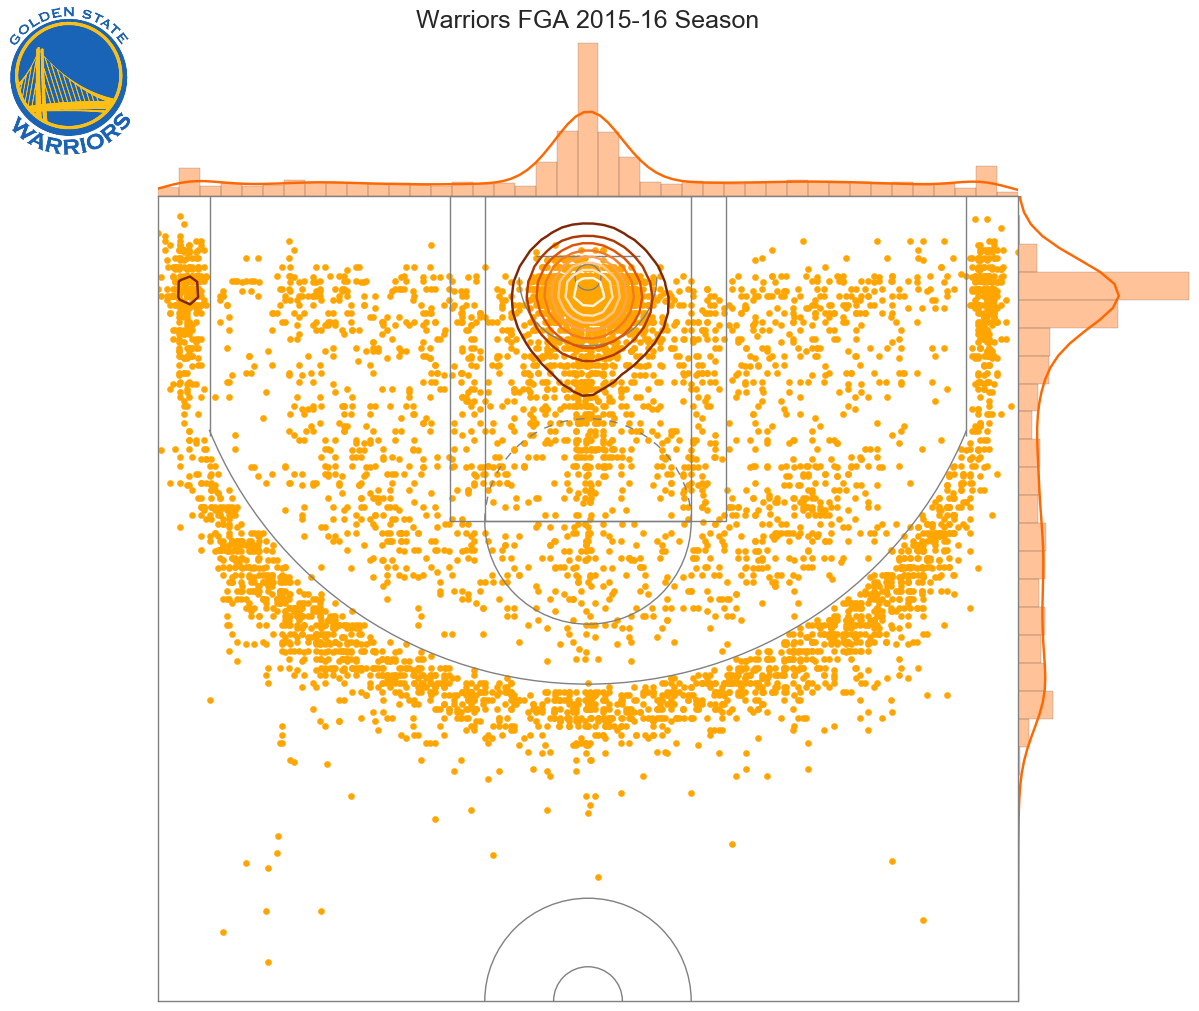

In [19]:
def on_button_clicked_alt(b):
    df = shots[shots.team_name == selection_kde.value]
    cmap=plt.cm.gist_heat_r
    grid = nba.shot_chart_jointgrid(df.loc_x, df.loc_y, joint_color = 'orange',marginals_color=cmap(.3), title=('{} FGA 2015-16 Season').format(selection_kde.value))
    grid.plot_joint(sns.kdeplot, cmap=plt.cm.Oranges_r)
    offset_img = OffsetImage(team_logo(selection_kde.value), zoom=0.4)
    offset_img.set_offset((-10,850))
    grid.ax_joint.add_artist(offset_img)
button = widgets.Button(description= 'Plot KDE shot chart');
display(button);

button.on_click(on_button_clicked_alt);
plt.show();

import warnings
warnings.filterwarnings('ignore')

#### Attempting to make a shot chart similar to Kirk Goldsberry's shot charts

![](https://espngrantland.files.wordpress.com/2015/06/splashbrothers_1152.png)

### Hex with Histogram and KDE Marginal Joint Plot

In [20]:
selection_alt = widgets.Dropdown(description ='Pick an NBA team');
selection_alt.options = team_id.TEAM_NAME.tolist();
display(selection_alt);

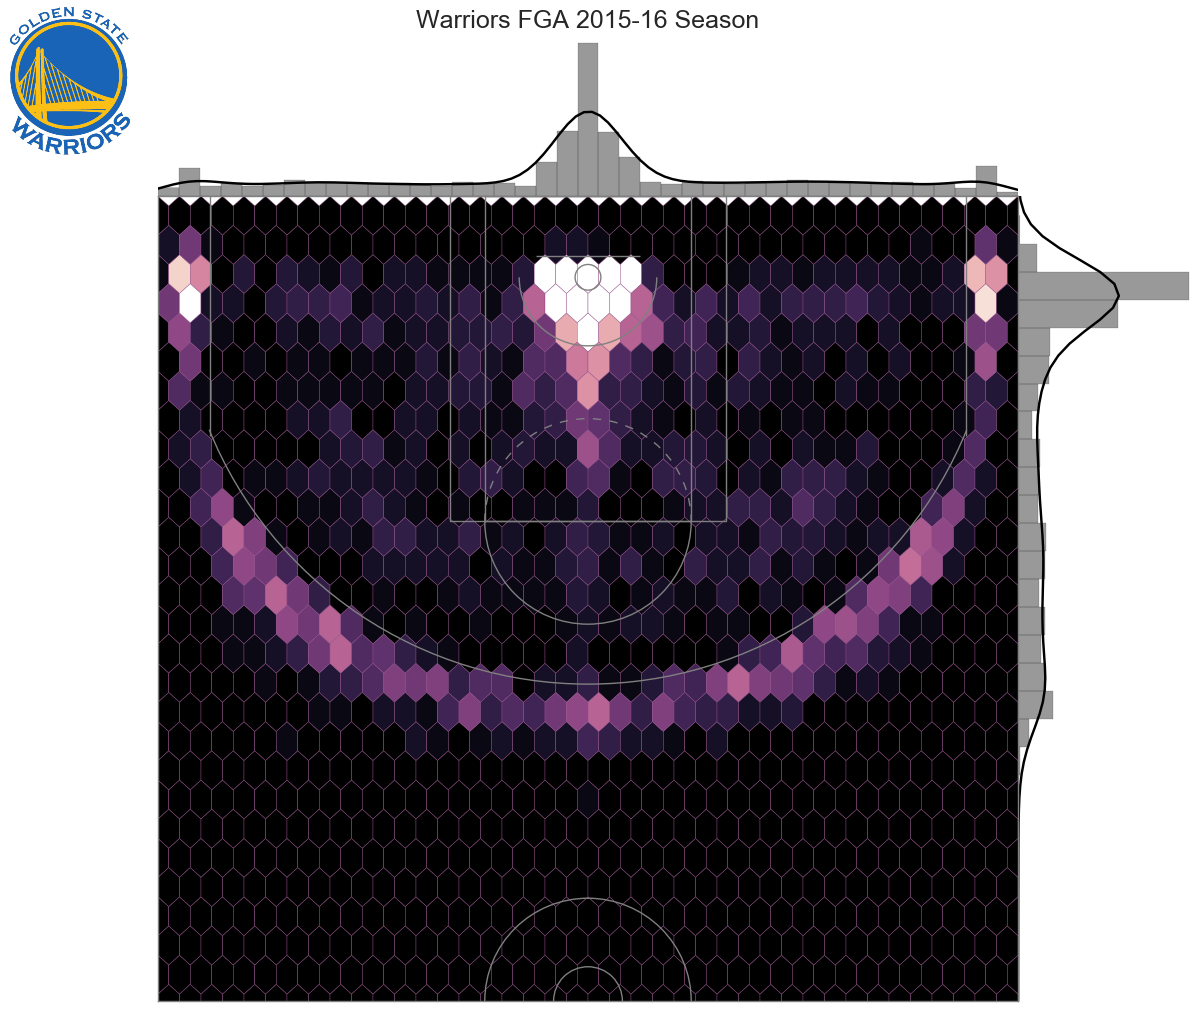

In [21]:
def on_button_clicked_alt(b):
    df = shots[shots.team_name == selection_alt.value]
    cmap=sns.cubehelix_palette(as_cmap=True,hue = 1,gamma=1, dark=0, light=10, reverse=True)
    grid = nba.shot_chart_jointgrid(df.loc_x, df.loc_y,joint_type="hex",marginals_color= 'black', color=cmap(10), cmap=cmap, gridsize=40, title=('{} FGA 2015-16 Season').format(selection_alt.value))
    offset_img = OffsetImage(team_logo(selection_alt.value), zoom=0.4)
    offset_img.set_offset((-10,850))
    grid.ax_joint.add_artist(offset_img)
button = widgets.Button(description= 'Plot hex shot chart');
display(button);

button.on_click(on_button_clicked_alt);
plt.show();

### Stephen Curry's Record Season with a KDE Joint Plot

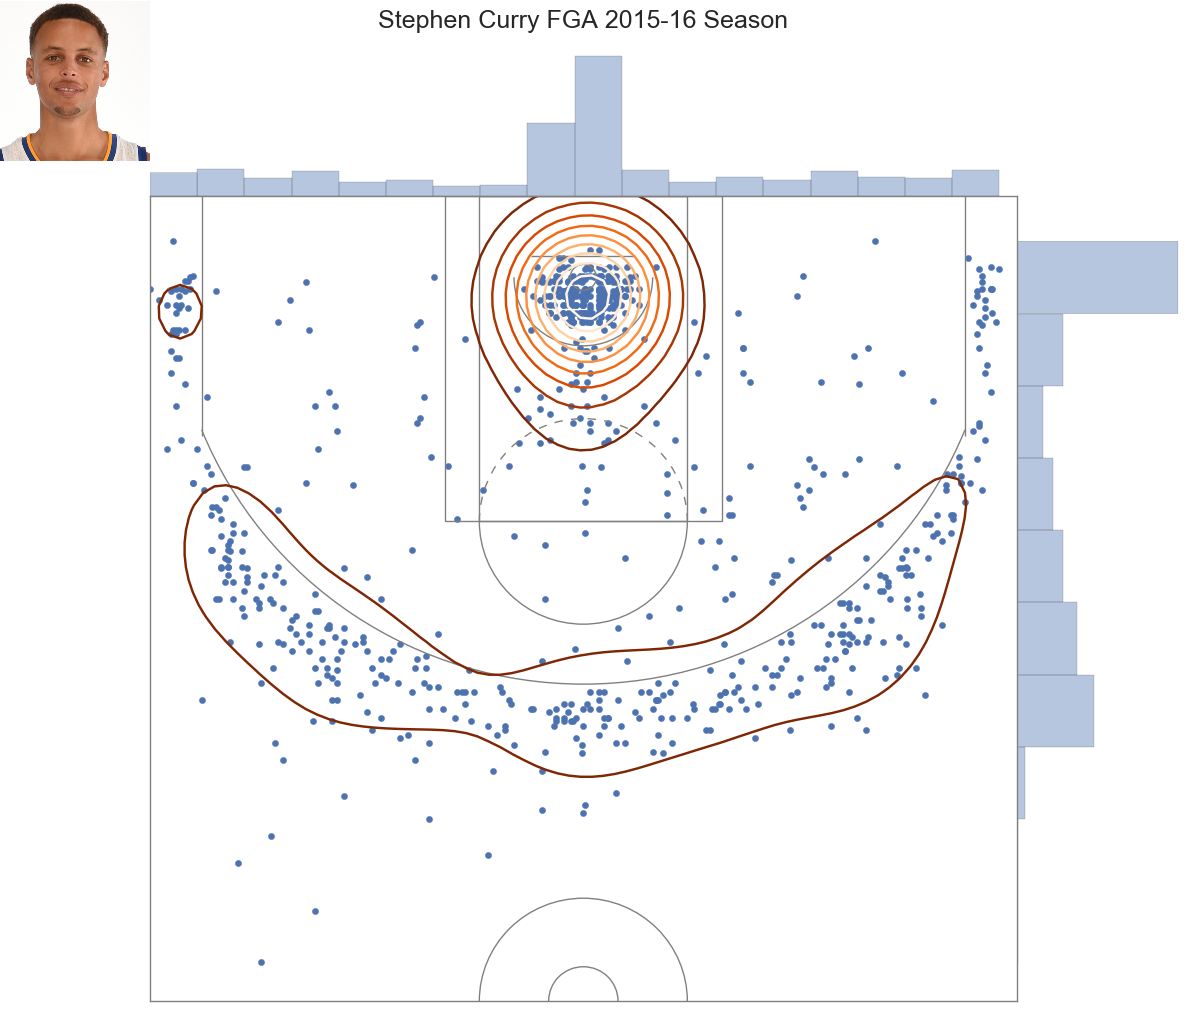

In [16]:
df = shots[(shots.player_id == 201939) & (shots.shot_made_flag == 1)]
cmap=sns.cubehelix_palette(as_cmap=True, dark=0, light=10, reverse=True)
grid = nba.shot_chart_jointplot(df.loc_x, df.loc_y, cmap=cmap, title='Stephen Curry FGA 2015-16 Season')
grid.plot_joint(sns.kdeplot, cmap=plt.cm.Oranges_r)
img_file = "logos/curry.jpg"
im =Image.open(img_file)
offset_img = OffsetImage(im, zoom=0.4)
offset_img.set_offset((-10,850))
grid.ax_joint.add_artist(offset_img)

import warnings
warnings.filterwarnings('ignore')

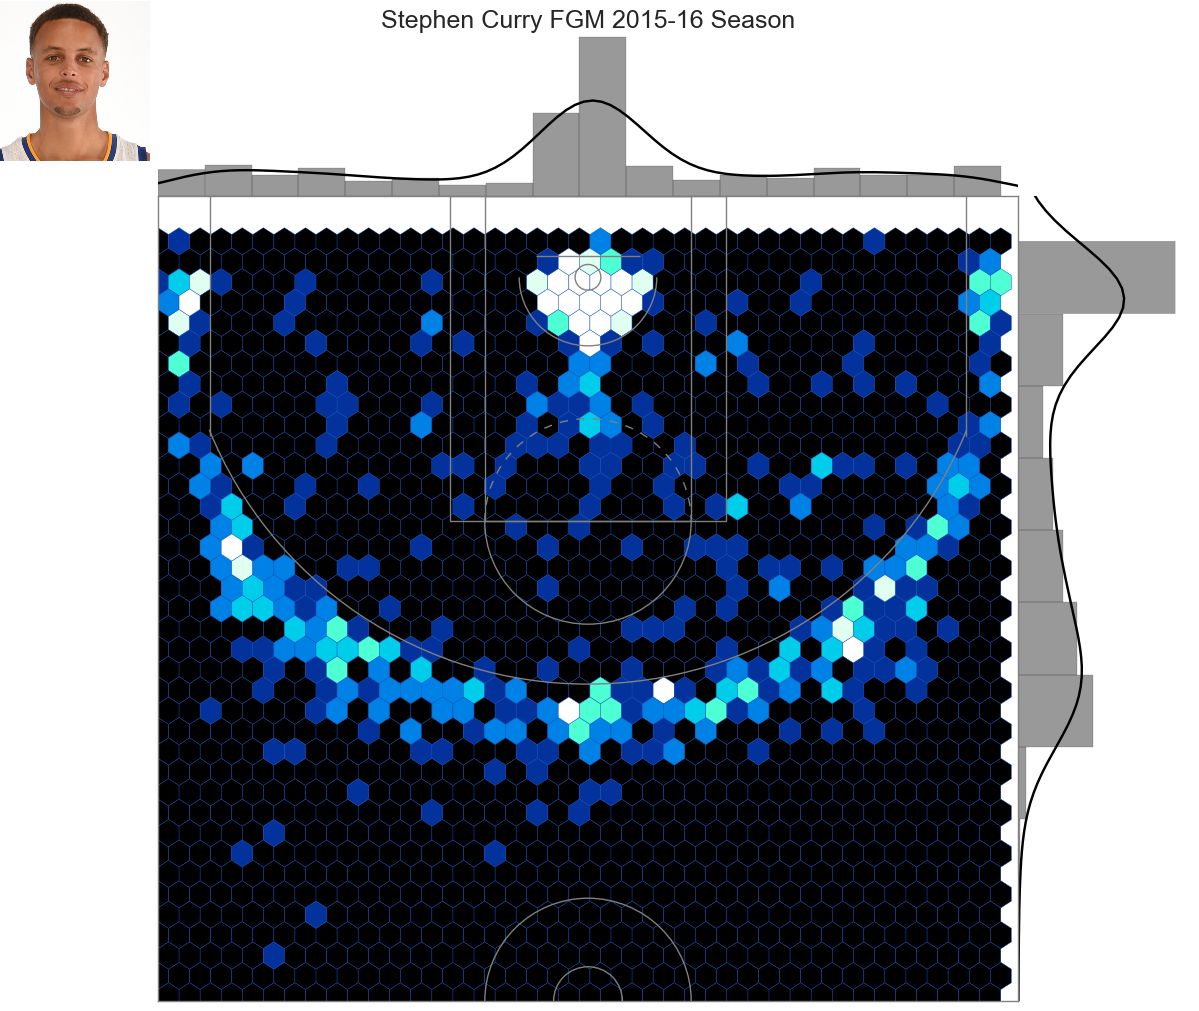

In [17]:
sc = shots[(shots.player_id == 201939) & (shots.shot_made_flag == 1)]
cmap=sns.cubehelix_palette(as_cmap=True,start = 3,gamma=1, hue = 3, dark=0, light=6,rot=-.3, reverse=True)
grid = nba.shot_chart_jointgrid(sc.loc_x, sc.loc_y,joint_type="hex",marginals_color= 'black', color=cmap(10), cmap=cmap, gridsize=40, title='Stephen Curry FGM 2015-16 Season')
img_file = "logos/curry.jpg"
im =Image.open(img_file)
offset_img = OffsetImage(im, zoom=0.4)
offset_img.set_offset((-10,850))
grid.ax_joint.add_artist(offset_img)

import warnings
warnings.filterwarnings('ignore')